In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from analysis.utils import optimise_model, plot_variable_importance, recursive_feature_elimination, load_model, \
    save_model, print_performance_measures

In [2]:
df = pd.read_csv('../data/df_simple_model.csv', index_col=0)
results = pd.DataFrame(index=df.index)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15747 entries, 5 to 18334
Columns: 1447 entries, Age to PositionCategory_Sturm
dtypes: float64(5), int64(1442)
memory usage: 174.0 MB


In [4]:
y = df["Value"]
X = df.drop("Value", axis = 1)

# XGBoost

In [5]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y)

save_model(xgb_optimized, 'simple-model-xgb')

cv_results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
1h 55min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


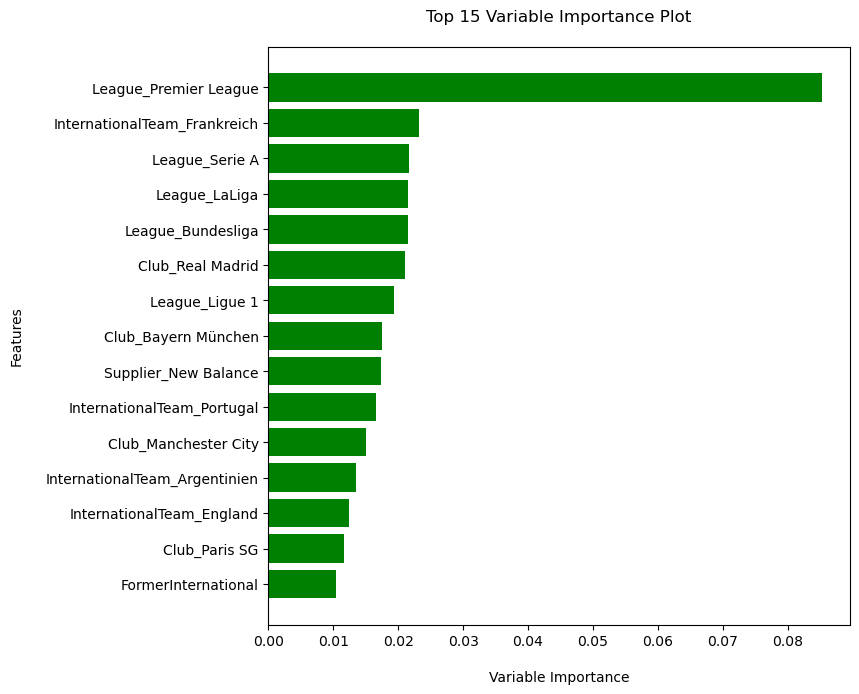

In [12]:
xgb_optimized = load_model('simple-model-xgb')
plot_variable_importance(xgb_optimized, X, n=15)

In [7]:
y_pred_xgb = xgb_optimized.predict(X)
results['PredictedValueSimpleModelXGB'] = y_pred_xgb
print_performance_measures(y, y_pred_xgb)

RMSE:	2148932.959
R^2:	0.9116


# Export Results

In [8]:
results.to_csv('../data/df_simple_model_results.csv')

# Recursive Feature Elimination

In [10]:
%%timeit -r 1 -n 1

feature_table = recursive_feature_elimination(xgb_optimized, X, y)
feature_table

KeyboardInterrupt: 